<a href="https://colab.research.google.com/github/sungmich/2022_AI/blob/main/%EC%8B%A4%EC%8A%B51_1_%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch #파이토치 import
import numpy as np # numpy => 파이썬 수치 계산 라이브러리

In [ ]:
inputs = np.array([[2],[4],[6],[8]], 
                  dtype='float32')
targets = np.array([3,4,5,6], 
                   dtype='float32')

In [ ]:
inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)

In [ ]:
from torch.utils.data import TensorDataset, DataLoader

dataset = TensorDataset(inputs, targets)
loader = DataLoader(dataset, batch_size=4)

In [ ]:
w = torch.randn(1,1,requires_grad=True) # 임의의 값
b = torch.randn(1,requires_grad=True) # 임의의 값 requires_grad => 미분값 계산시 필요

In [ ]:
def model(X):
    return X @ w.t() + b # @ : 행렬연산 / .t => transpose => 차원이 여러가지일 때 필요 => 현재 상황에서는 사실 필요 x

In [ ]:
def mse_loss(predictions, targets):
    difference = predictions - targets
    return torch.sum(difference * difference) / difference.numel()

In [ ]:
for x,y in dataset:#아직은 예측이 형편없음
    preds = model(x)
    print(f'Prediction: {preds.item():.2f} / Actual target: {y.item():.2f} / loss: {mse_loss(preds, y):.2f}')

Prediction: -3.39 / Actual target: 3.00 / loss: 40.88
Prediction: -6.24 / Actual target: 4.00 / loss: 104.83
Prediction: -9.08 / Actual target: 5.00 / loss: 198.35
Prediction: -11.93 / Actual target: 6.00 / loss: 321.45


In [ ]:
epochs = 10000 #이 블럭이 제일 중요함
for i in range(epochs): # 학습 10000번
    for x,y in loader:
        # Generate Prediction
        preds = model(x)
        # Get the loss and perform backpropagation
        loss = mse_loss(preds[:, 0], y)
        loss.backward()
        # Let's update the weights
        with torch.no_grad():
            w -= w.grad * 1e-3
            b -= b.grad * 1e-3
            # Set the gradients to zero
            w.grad.zero_()
            b.grad.zero_()
    #print(f"Epoch {i}/{epochs}: Loss: {loss}")

In [ ]:
for x,y in dataset:
    preds = model(x)
    print(f'Prediction: {preds.item():.2f} / Actual target: {y.item():.2f} / loss: {mse_loss(preds, y):.2f}')

Prediction: 2.94 / Actual target: 3.00 / loss: 0.00
Prediction: 3.97 / Actual target: 4.00 / loss: 0.00
Prediction: 5.00 / Actual target: 5.00 / loss: 0.00
Prediction: 6.03 / Actual target: 6.00 / loss: 0.00


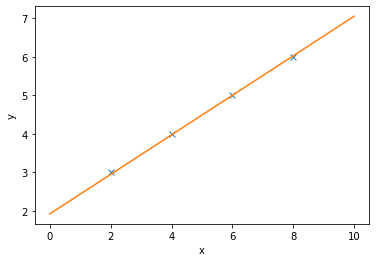

In [ ]:
import matplotlib.pyplot as plt

x_tmp = np.arange(0,11,1)
y_tmp = w.detach().numpy()*x_tmp+b.detach().numpy()
plt.plot(inputs,targets,'x')
plt.plot(x_tmp,y_tmp[0])
plt.xlabel('x')
plt.ylabel('y')
plt.show()